In [141]:
import h5py
import numpy as np

import random
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import randint

plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,30))

<Figure size 720x2160 with 0 Axes>

<Figure size 720x2160 with 0 Axes>

In [ ]:
file.close()

In [265]:
#if file does not exist create new one (M-n of months A-n of appliances)
file_name = "ukdale_H_test_GASF_13m_100S10X_Y-TS_1A10N_AB_N-O_Y-S"
path = "D:/jjenko/nilm data/GAF_DS/"
file = h5py.File(f"{path}""/"f"{file_name}"".hdf5", "r+")


In [266]:
for dataset in file.keys():
    if dataset == "ukdale":
        for appliance in file[f'{dataset}'].keys():
            for building in file[f'{dataset}'"/"f'{appliance}'].keys():
                train_data = file[dataset+"/"+appliance+"/"+building+"/gaf"]
                source_data = file[dataset+"/"+appliance+"/"+building+"/ts"]
                print(dataset,appliance,building)
            

ukdale microwave 1
ukdale microwave 2
ukdale microwave 5


In [192]:
source_data[1,3,...,0]

0.0

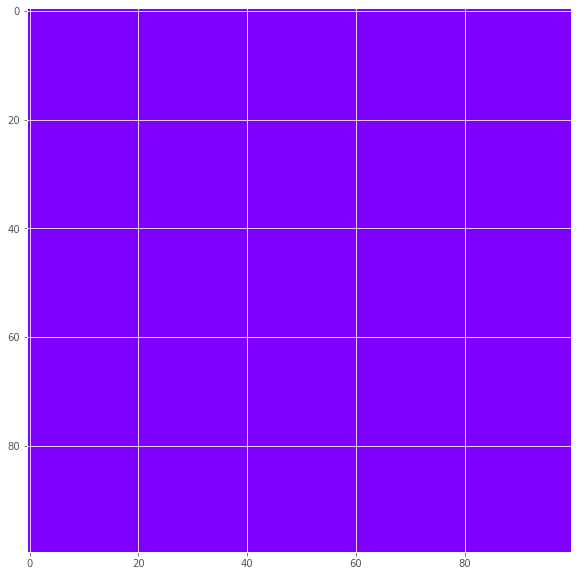

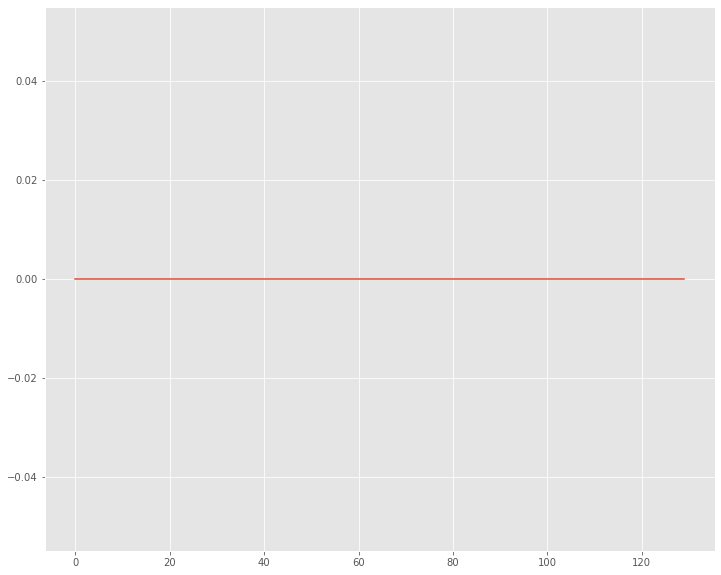

In [279]:
someN = 4
someM = 3
fig, ax = plt.subplots()
ax.imshow(train_data[someN,someM,...,0], cmap='rainbow')
fig, ax = plt.subplots()

ax.plot(source_data[someN][someM])



In [ ]:
#reading h5 file example [OLD]
file_name = "ECO_GASF_13m_100S10X_3A150N_N-B4_N-O_Y-S"
dataset= "redd"
path = "D:/jjenko/nilm data/GAF_DS/"
#read the file
file = h5py.File(f"{path}""/"f"{file_name}"".hdf5", "r+")
#fetch array of appliances
enc_appliances = np.array(file["classes/appliances"])
manualy_selected_appliances  = [n.decode("utf-8") for n in enc_appliances]

print(manualy_selected_appliances)

weights = np.array(file["classes/weights"])

train_data = np.array(file["data/gasf"])
label_data = np.array(file["labels/gaf"])
label_data_buildings = np.array(file["labels/building"])
print("labels unique", np.unique(label_data))
print("labels",label_data.shape)
print("building labels",label_data.shape)
print("train data shape:",train_data.shape)
file.close()

In [ ]:
#save figures (old)
labels = np.unique(label_data)
for label in labels :
    indexes_of_label = np.where(label_data == label)
    for i in range(10):
        # Show retrieved image
        fig, ax = plt.subplots()
        #for multudim
        #ax.imshow(train_data[random.choice(indexes_of_label[0]),randint(0,),...,0], cmap='rainbow',origin='lower')
        #for 1D
        ax.imshow(train_data[random.choice(indexes_of_label[0]),...,0], cmap='rainbow',origin='lower')
        appl = manualy_selected_appliances[np.where(labels==label)[0][0]]
        fig.savefig("D:/jjenko/nilm data/GAF_DS/imgs/"f"{dataset}""/"f"{i}""_"f"{appl}"".png")
        plt.close()
